### 1- Imports

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt

### 2- Fouille de données

In [2]:
FILE = '../data/raw/providers.csv'
df = pd.read_csv(FILE)

In [3]:
df.shape

(227, 10)

In [4]:
df.head(10)

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
5,14,6,NaN,driivme,DriiveMe,False,False,False,False,car
6,15,8,NaN,alsa,Alsa,False,False,False,False,bus
7,16,9,NaN,distribusion,Distribusion,False,False,False,False,bus
8,17,9,31,expressbusMunchen,Expressbus Munchen,False,False,False,False,bus
9,18,9,33,berlinLinienBus,Berlin Linien Bus,False,False,False,False,bus


In [5]:
df.dtypes

id                       int64
company_id               int64
provider_id             object
name                    object
fullname                object
has_wifi                object
has_plug                object
has_adjustable_seats    object
has_bicycle             object
transport_type          object
dtype: object

In [6]:
df.isna().any()

id                      False
company_id              False
provider_id              True
name                    False
fullname                False
has_wifi                 True
has_plug                 True
has_adjustable_seats     True
has_bicycle              True
transport_type          False
dtype: bool

In [7]:
sorted(df.company_id.unique()), df.company_id.nunique()

([1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 20, 30, 40], 14)

In [8]:
df_companies = df.query('provider_id.isnull()')[['company_id', 'fullname']]
print (df_companies)

     company_id        fullname
0             1          Ouibus
1             2      Deinbus.de
2             3         Infobus
3             4  Student Agency
4             5         Flixbus
5             6        DriiveMe
6             8            Alsa
7             9    Distribusion
208          10    Voyages SNCF
212          20        Transdev
223          11       Blablacar
224          30           Vatry
225          40         Beauval
226          12         idVroom


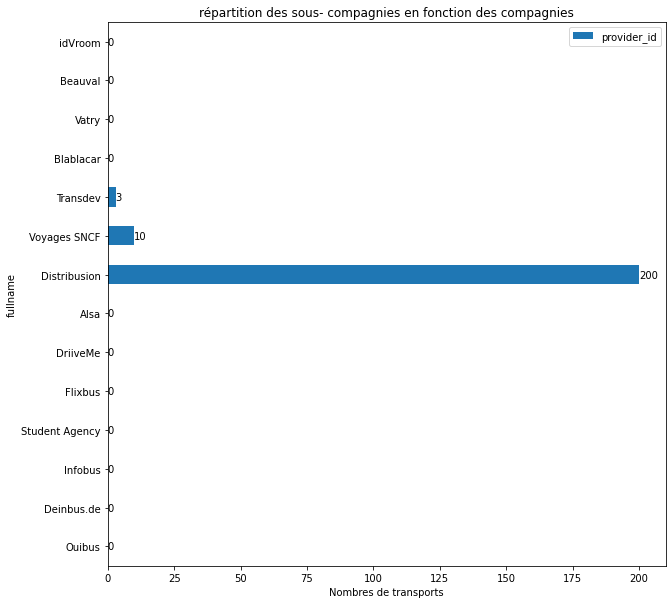

In [9]:
df_groupby_count_providers = df.groupby('company_id')['provider_id'].nunique()
df_to_plot = df_companies.join (df_groupby_count_providers, on=['company_id'])
ax = df_to_plot.plot(kind='barh'
                    , x='fullname'
                    , y='provider_id'
                    , figsize= (10,10))

ax.set_xlabel('Nombres de transports')
ax.set_title('répartition des sous- compagnies en fonction des compagnies')
ax.bar_label(ax.containers[0])
plt.show()

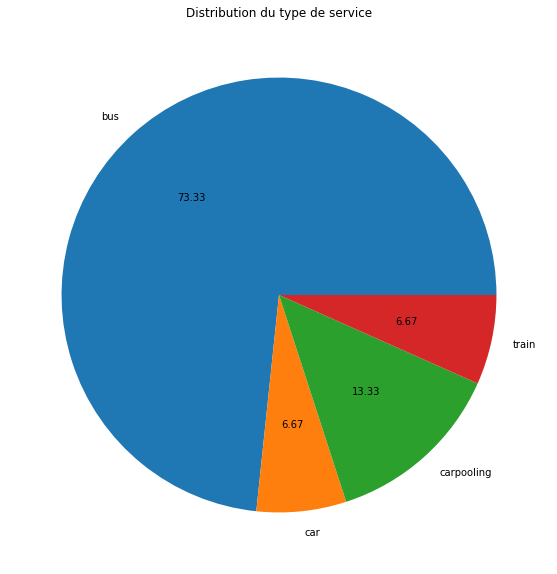

In [10]:
df_groupby_transport_type = df.groupby('transport_type')['company_id'].nunique()
ax = df_groupby_transport_type.plot(kind='pie'
                                    , figsize= (10,10)
                                    , title='Distribution du type de service'
                                    , ylabel=''
                                    , xlabel=''
                                    , autopct='%.2f'
                                    )
plt.show()

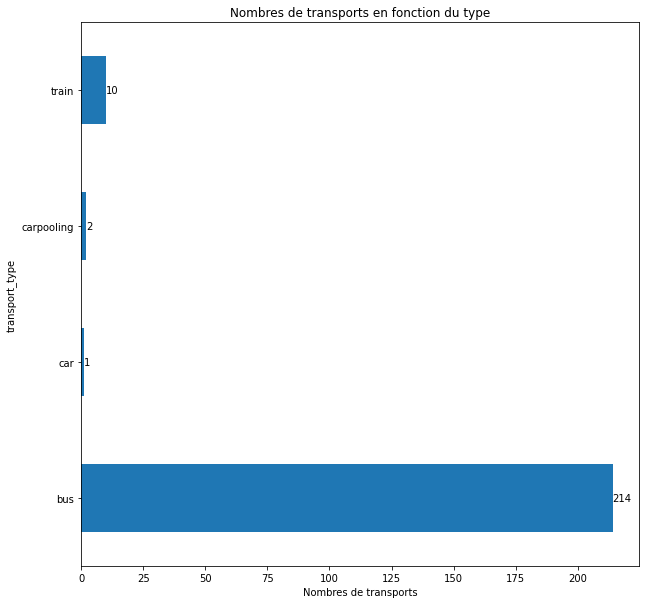

In [11]:
df_groupby_count_transport_type = df.groupby('transport_type')['transport_type'].count()

ax = df_groupby_count_transport_type.plot.barh(figsize = (10,10))

ax.set_xlabel('Nombres de transports')
ax.set_title('Nombres de transports en fonction du type')
ax.bar_label(ax.containers[0])
plt.show()


In [12]:
df_copy = df.copy()
dict_to_replace = {}
for i in df_companies['company_id']:
    dict_to_replace[i] = df_companies.loc[df_companies['company_id'] == i].fullname
df_copy = df_copy.replace ({'company_id':dict_to_replace})

In [13]:
df_groupby_count_company_transport = df_copy.groupby(['company_id', 'transport_type'] )['transport_type'].count()

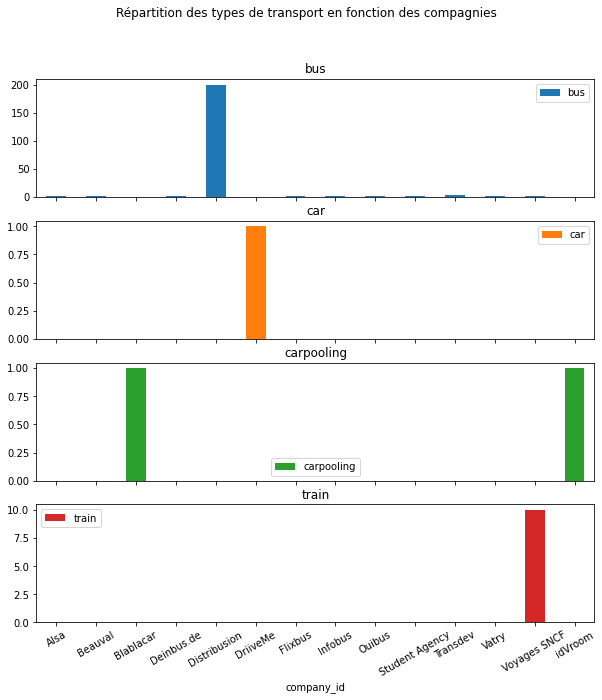

In [14]:
ax = df_groupby_count_company_transport.unstack().plot(kind='bar'
                                                        , layout=(4, 1)
                                                        , figsize=(10,10)
                                                        , subplots=True
                                                        , title='Répartition des types de transport en fonction des compagnies'
                                                        , rot=30)
plt.show()

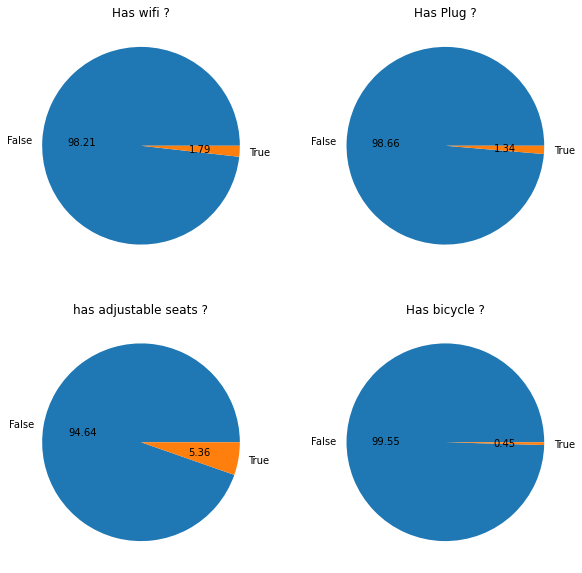

In [15]:
fig, ax = plt.subplots(figsize=(10, 10)
                        , nrows=2
                        , ncols=2)
axe = ax.ravel()
titles = ['Has wifi ?', 'Has Plug ?', 'has adjustable seats ?', 'Has bicycle ?']
for i, column in enumerate(['has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle']):
    df_copy[column].value_counts().plot(kind='pie'
                                        , title=titles[i]
                                        , ylabel=''
                                        , xlabel=''
                                        , autopct='%.2f'
                                        , ax=axe[i])
plt.show()


In [16]:
df_duplicated = df[df.duplicated(["fullname","has_wifi","has_plug","has_adjustable_seats","has_bicycle","transport_type"], keep=False)]
print (df_duplicated)

       id  company_id provider_id             name    fullname has_wifi  \
213  8375          10           0         trainter         TER    False   
215  8377          10           2  corailintercite  Intercités    False   
218  8380          10           5            train         TER    False   
221  8383          10           9           corail  Intercités    False   

    has_plug has_adjustable_seats has_bicycle transport_type  
213    False                 True       False          train  
215    False                 True       False          train  
218    False                 True       False          train  
221    False                 True       False          train  


### Analyses

- id : identifiant
- company_id : identifiant de la compagnie
- provider_id : identifiant de la sous compagnie
- name : nom
- fullname : nom officiel 
- has_wifi : wifi présent ou non
- has_plug : prise présente ou non
- has_adjustable_seats : siège ajustable ou non
- has_bicycle : porte vélo ou non 
- transport_type : type de transport

Lorsque une ligne contient un company_id et pas de provider_id, il s'agit de la compagnie qui englobe des sous-compagnies. <br/>
Il y a 14 compagnies : <br/>
[Ouibus, Deinbus.de, Infobus, Student Agency, Flixbus, DriiveMe, Alsa, Distribusion, Voyages SNCF, Transdev, Blablacar, Vatry, Beauval, idVroom] <br/>
Distribusion détient plus de 90% des sous compagnies. Le reste est partagé avec Voyage SNCF et Transdev. <br/>
Près de 94% des transports sont des bus. <br/>
73% des compagnies proposent des bus comme moyen de locomotion. <br/>
On remarque des monopoles : bus (Distribusion), car (DriiveMe) et train (Voyages SNCF) <br/>
Le carpooling est partagé entre IdVroom et Blablacar.

Parmi les providers, on remarque la présence de 2 doublons : TER et Intercités. D'après le nom donné à ces doublons, il se peut que certaines données proviennent de différentes sources, ce qui expliquerait la multiplication de noms pour un même provider. <br/>

### Data Preparation


In [17]:
df_copy = df_copy.drop_duplicates(subset=["fullname","has_wifi","has_plug","has_adjustable_seats","has_bicycle","transport_type"])

In [18]:
df_copy.to_csv('../data/cleaned/providers_cleaned.csv')